#**TEXT CLEANING**
1. Made a clean_text function which cleans the raw data.

In [ ]:
import pandas as pd

df=pd.read_json("/content/problems_data.jsonl",lines=True)
df.shape

(4112, 8)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
import re
import unicodedata
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    if text is None or not isinstance(text, str):
        return ""

    # 1. Normalize unicode (ö → o, é → e)
    # We do this BEFORE stripping non-ascii to keep the base characters
    text = unicodedata.normalize("NFKD", text)
    text = text.encode("ascii", "ignore").decode("utf-8")
    text = text.lower()

    # 2. PRESERVE ALGO KEYWORDS (Do this before punctuation removal)
    # This ensures "dynamic programming" stays as one feature: "dynamic_programming"
    algo_keywords = {
        r'union[ \-]find': ' union_find ',
        r'dynamic[ \-]programming': ' dynamic_programming ',
        r'segment[ \-]trees?': ' segment_tree ',
    }
    for pattern, replacement in algo_keywords.items():
        text = re.sub(pattern, replacement, text)

    # 3. REPLACE LATEX → TEXT TOKENS (Safer for TF-IDF than symbols like ≤)
    replacements = {
        r'\\leq': ' leq ', r'\\geq': ' geq ', r'\\lt': ' lt ', r'\\gt': ' gt ',
        r'\\le': ' leq ', r'\\ge': ' geq ', r'\\neq': ' neq ', r'\\cdot': ' times '
    }
    for latex, word in replacements.items():
        text = re.sub(latex, word, text)

    # 4. Fix spaced numbers (1, 000 -> 1000)
    text = re.sub(r'(\d+)([,\\\s]+)(\d+)', r'\1\3', text)

    # 5. Punctuation removal
    # We keep underscore (_) because we used it in our algorithm keywords!
    text = re.sub(r"[()\n!,:'\"$.?{}\\/]", " ", text)

    # 6. Replace numbers with 'num'
    text = re.sub(r'\d+', ' num ', text)

    # 7. Remove dummy patterns (ababa, abcdef)
    text = re.sub(r'\b([a-z]{1,3})\1+\b', ' ', text)
    text = re.sub(r'\babc(def)?\b', ' ', text)

    # 8. Stopwords & Lemmatization (Moved into the flow)
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    # Keep logic-heavy words
    programming_stops = {'if', 'while', 'for', 'each'}
    stop_words = stop_words - programming_stops

    words = text.split()
    # Apply lemmatization and filter words
    cleaned_words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words and len(w) > 1]

    return " ".join(cleaned_words).strip()

In [ ]:

# 1. Combine fields
df['combined_raw'] = df['description'] + " " + \
                     df['input_description'].fillna('') + " " + \
                     df['output_description'].fillna('')

# 3. Clean text for Classification
df['cleaned_text'] = df['combined_raw'].apply(clean_text)

# 4. Drop empty results
df = df[df['cleaned_text'].str.strip() != ""]

In [ ]:
class_mapping = {'easy': 0, 'medium': 1, 'hard': 2}
df['problem_level'] = df['problem_class'].str.lower().map(class_mapping)

In [ ]:
final_df = df[['cleaned_text', 'problem_score', 'problem_level']]

In [ ]:
pd.set_option("display.max_colwidth", None)

In [ ]:
final_df.loc[0]

,0
cleaned_text,unununium name chemical element atom number num changed rontgenium rg num heavy element unstable synthesized laboratory hired one lab optimize algorithm used simulation for example simulating complicated chemical reaction important keep track many particle done counting connected component graph currently lab python code see attachment take undirected graph output number connected component see code based everyones favourite data structure union_find num looking code for while notice actually bug code still give correct answer bug could cause run inefficiently task construct graph given number vertex edge code run slowly count many time third line one inside while loop visited program get score according number input consists one line two integer number vertex edge graph apart sample one test case num num output consists line th contains two integer u_ v_ num leq u_ v_ leq indicates vertex u_ v_ connected edge graph
problem_score,9.7
problem_level,2


In [ ]:
import pandas as pd
import re
import unicodedata
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# --- SETUP: Essential for Lemmatization and Stopwords ---
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

def clean_text(text):
    if text is None or not isinstance(text, str):
        return ""

    # 1. Normalize unicode (ö → o, é → e)
    text = unicodedata.normalize("NFKD", text)
    text = text.encode("ascii", "ignore").decode("utf-8")
    text = text.lower()

    # 2. PRESERVE ALGO KEYWORDS
    algo_keywords = {
        r'union[ \-]find': ' union_find ',
        r'dynamic[ \-]programming': ' dynamic_programming ',
        r'segment[ \-]trees?': ' segment_tree ',
        r'binary[ \-]search': ' binary_search ',
        r'shortest[ \-]path': ' shortest_path '
    }
    for pattern, replacement in algo_keywords.items():
        text = re.sub(pattern, replacement, text)

    # 3. REPLACE LATEX → TEXT TOKENS
    replacements = {
        r'\\leq': ' leq ', r'\\geq': ' geq ', r'\\lt': ' lt ', r'\\gt': ' gt ',
        r'\\le': ' leq ', r'\\ge': ' geq ', r'\\neq': ' neq ', r'\\cdot': ' times '
    }
    for latex, word in replacements.items():
        text = re.sub(latex, word, text)

    # 4. Fix spaced numbers (1 000 -> 1000)
    text = re.sub(r'(\d+)([,\\\s]+)(\d+)', r'\1\3', text)

    # 5. Punctuation removal (Keep underscore for our keywords)
    text = re.sub(r"[()\n!,:'\"$.?{}\\/]", " ", text)

    # 6. Replace numbers with 'num'
    text = re.sub(r'\d+', ' num ', text)

    # 7. Remove dummy patterns (ababa, abcdef)
    text = re.sub(r'\b([a-z]{1,3})\1+\b', ' ', text)
    text = re.sub(r'\babc(def)?\b', ' ', text)

    # 8. Stopwords & Lemmatization
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    programming_stops = {'if', 'while', 'for', 'each'}
    stop_words = stop_words - programming_stops

    words = text.split()
    cleaned_words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words and len(w) > 1]

    return " ".join(cleaned_words).strip()

# --- PROCESSING THE DATAFRAME ---

# 1. Merge text fields
df['combined_raw'] = df['title'].fillna('') + " " + \
                     df['description'].fillna('') + " " + \
                     df['input_description'].fillna('') + " " + \
                     df['output_description'].fillna('')

# 2. Extract 'max_10_power' BEFORE cleaning (as cleaning replaces numbers with 'num')
def extract_max_power(text):
    powers = re.findall(r'10\^\{?(\d+)\}?', str(text))
    return max([int(p) for p in powers]) if powers else 0

df['max_10_power'] = df['combined_raw'].apply(extract_max_power)

# 3. Apply Clean Text
df['cleaned_text'] = df['combined_raw'].apply(clean_text)

# 4. Map the Category into 0, 1, 2
# Note: Check if your column is named 'problem_class' or 'problem_level'
class_map = {'easy': 0, 'medium': 1, 'hard': 2}
df['class_encoded'] = df['problem_class'].str.lower().map(class_map)

# 5. FINAL SELECTION
final_df = df[['cleaned_text', 'max_10_power', 'problem_score', 'class_encoded']]

# 6. Remove any rows that ended up empty or have NaN scores
final_df = final_df[final_df['cleaned_text'] != ""]
final_df = final_df.dropna()

print(f"Final dataset ready with {len(final_df)} rows.")
final_df.head(1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Final dataset ready with 4111 rows.


,cleaned_text,max_10_power,problem_score,class_encoded
0,unununium name chemical element atom number num changed rontgenium rg num heavy element unstable synthesized laboratory hired one lab optimize algorithm used simulation for example simulating complicated chemical reaction important keep track many particle done counting connected component graph currently lab python code see attachment take undirected graph output number connected component see code based everyones favourite data structure union_find num looking code for while notice actually bug code still give correct answer bug could cause run inefficiently task construct graph given number vertex edge code run slowly count many time third line one inside while loop visited program get score according number input consists one line two integer number vertex edge graph apart sample one test case num num output consists line th contains two integer u_ v_ num leq u_ v_ leq indicates vertex u_ v_ connected edge graph,0,9.7,2


#**FEATURE EXTRACTION**
1. Making tfidf features.
2. Also finding some hand made useful features.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
import pandas as pd

# 1. Initialize TF-IDF Vectorizer
# max_features=5000: We keep only the 5000 most important words/bigrams
# ngram_range=(1, 2): We look at single words AND pairs of words (e.g., "shortest path")
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# 2. Vectorize the cleaned text
X_text = tfidf.fit_transform(final_df['cleaned_text'])

# 3. Add the numerical 'max_10_power' feature (Optional but highly recommended for Score)
# We use hstack to combine the sparse TF-IDF matrix with our numerical column
if 'max_10_power' in final_df.columns:
    X_numeric = final_df[['max_10_power']].values
    X_combined = hstack([X_text, X_numeric])
else:
    X_combined = X_text

# 4. Define our Targets
# Classification target (0, 1, 2)
y_class = final_df['class_encoded']
# Regression target (Numerical Score)
y_score = final_df['problem_score']

print(f"Feature matrix shape: {X_combined.shape}")

Feature matrix shape: (4111, 5001)


In [ ]:
def extract_handcrafted_features(text):
    text_lower = str(text).lower()

    # 1. Algorithm Keywords
    algos = ['union find', 'dynamic programming', 'segment tree', 'graph',
             'shortest path', 'binary search', 'flow', 'matching', 'tree']
    algo_count = sum(1 for a in algos if a in text_lower)

    # 2. Math Indicators
    math_terms = ['modulo', 'prime', 'probability', 'expected', 'matrix', 'gcd', 'lcm']
    math_count = sum(1 for m in math_terms if m in text_lower)

    # 3. Word Count
    word_count = len(text_lower.split())

    # 4. Constraint Count (How many variables like N, M, K are constrained)
    constraint_count = len(re.findall(r'[n_m_k_t]\s*[\\leq|\\le|<=|<]', text_lower))

    return pd.Series([algo_count, math_count, word_count, constraint_count])



# --- APPLYING TO DATAFRAME ---

# Extracting the 4 new features
final_df[['algo_count', 'math_count', 'word_count', 'constraint_count']] = df['combined_raw'].apply(extract_handcrafted_features)

# Remember to include the max_10_power we made earlier
# df['max_10_power'] = ...

In [ ]:
from scipy.sparse import hstack, csr_matrix

# 1. Transform text to TF-IDF
X_tfidf = tfidf.transform(final_df['cleaned_text'])

# 2. Convert handcrafted features to a matrix
# Scale them if using Logistic Regression/SVM, but for Random Forest it's fine as is
X_handcrafted = final_df[['max_10_power', 'algo_count', 'math_count', 'word_count', 'constraint_count']].values

# 3. Join them
X_final = hstack([X_tfidf, csr_matrix(X_handcrafted)])

print(f"New Feature Matrix Shape: {X_final.shape}")

New Feature Matrix Shape: (4111, 5005)


#**MODELS**

In [ ]:
from sklearn.model_selection import train_test_split

# Define Targets
y_class = df['problem_class']
y_score = df['problem_score']

# Split for Classification (use stratify to keep class balance)
X_train, X_test, y_train_class, y_test_class = train_test_split(
    X_final, y_class, test_size=0.2, random_state=42, stratify=y_class
)

# Split for Regression
X_train_reg, X_test_reg, y_train_score, y_test_score = train_test_split(
    X_final, y_score, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# We use MaxAbsScaler because it works well with Sparse TF-IDF data
classification_models = {
    "Logistic Regression": make_pipeline(
        MaxAbsScaler(),
        LogisticRegression(max_iter=2000, class_weight='balanced')
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        class_weight='balanced',
        random_state=42
    ),
    "SVM": make_pipeline(
        MaxAbsScaler(),
        SVC(kernel='linear', class_weight='balanced')
    )
}

print("--- Classification Accuracy (5-Fold Cross-Validation) ---")
for name, model in classification_models.items():
    # cv=5 means it split the data 5 times and gives the average accuracy
    scores = cross_val_score(model, X_train, y_train_class, cv=5)
    print(f"{name}: {scores.mean():.2%} (+/- {scores.std():.2%})")

--- Classification Accuracy (5-Fold Cross-Validation) ---
Logistic Regression: 46.50% (+/- 2.18%)
Random Forest: 50.46% (+/- 0.97%)
SVM: 45.01% (+/- 1.42%)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

regression_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

print("\n--- Regression MAE (Average points off - Lower is Better) ---")
for name, model in regression_models.items():
    model.fit(X_train_reg, y_train_score)
    y_pred = model.predict(X_test_reg)
    mae = mean_absolute_error(y_test_score, y_pred)
    print(f"{name}: {mae:.2f}")


--- Regression MAE (Average points off - Lower is Better) ---
Linear Regression: 1.97
Random Forest Regressor: 1.70
Gradient Boosting: 1.71


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

regression_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

print("\n--- Regression Performance (MAE - Lower is Better) ---")
for name, model in regression_models.items():
    # We train on the full training set and evaluate on test for a quick look
    model.fit(X_train_reg, y_train_score)
    predictions = model.predict(X_test_reg)
    mae = mean_absolute_error(y_test_score, predictions)
    print(f"{name} MAE: {mae:.2f}")


--- Regression Performance (MAE - Lower is Better) ---
Linear Regression MAE: 1.97
Random Forest Regressor MAE: 1.70
Gradient Boosting MAE: 1.71


In [ ]:
import joblib

# 1. Final Training on all available data
final_clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
final_clf.fit(X_final, y_class)

final_reg = RandomForestRegressor(n_estimators=100, random_state=42)
final_reg.fit(X_final, y_score)

# 2. Save the components
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
joblib.dump(final_clf, 'classifier_model.pkl')
joblib.dump(final_reg, 'regressor_model.pkl')

# 3. The Prediction Pipeline
def predict_difficulty(title, description, input_desc, output_desc):
    # Combine inputs
    raw_text = f"{title} {description} {input_desc} {output_desc}"

    # A. Feature Extraction (Numeric)
    # Reuse your existing extract_handcrafted_features function
    handcrafted = extract_handcrafted_features(raw_text).values.reshape(1, -1)
    max_pow = extract_max_power(raw_text)

    # Combine numeric features (ensure order matches X_final!)
    # Order: max_10_power, algo_count, math_count, word_count, constraint_count
    numeric_features = np.array([[max_pow] + handcrafted[0].tolist()])

    # B. Text Cleaning & TF-IDF
    cleaned = clean_text(raw_text)
    tfidf_features = tfidf.transform([cleaned])

    # C. Combine
    X_input = hstack([tfidf_features, csr_matrix(numeric_features)])

    # D. Predict
    score = final_reg.predict(X_input)[0]
    difficulty_idx = final_clf.predict(X_input)[0]
    difficulty_map = {0: "Easy", 1: "Medium", 2: "Hard"}

    return {
        "Predicted Score": round(score, 2),
        "Difficulty Level": difficulty_map[difficulty_idx]
    }

In [ ]:
import numpy as np

Training models...

--- HONEST CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

        Easy       0.49      0.30      0.37       153
      Medium       0.53      0.84      0.65       389
        Hard       0.38      0.15      0.21       281

    accuracy                           0.51       823
   macro avg       0.47      0.43      0.41       823
weighted avg       0.47      0.51      0.45       823



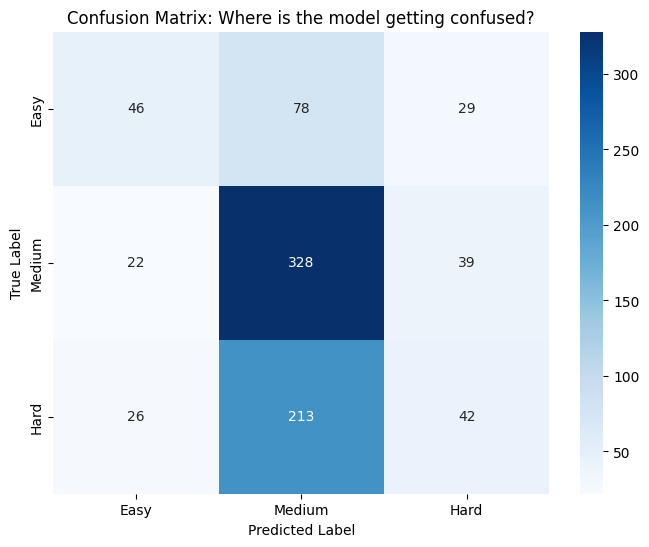


Model ready for testing!


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from scipy.sparse import hstack, csr_matrix

# 1. Initialize and Train the Final Models
# We use the X_train/y_train split to be 'honest' about performance on unseen data
clf_final = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
reg_final = RandomForestRegressor(n_estimators=100, random_state=42)

print("Training models...")
clf_final.fit(X_train, y_train_class)
reg_final.fit(X_train_reg, y_train_score)

# 2. Honest Classification Evaluation
y_pred_class = clf_final.predict(X_test)
target_names = ['Easy', 'Medium', 'Hard']

print("\n--- HONEST CLASSIFICATION REPORT ---")
print(classification_report(y_test_class, y_pred_class, target_names=target_names))

# 3. Confusion Matrix Visualization

cm = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title('Confusion Matrix: Where is the model getting confused?')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4. FIXED Prediction Function
def predict_difficulty(title, description, input_desc, output_desc):
    # Combine text
    raw_text = f"{title} {description} {input_desc} {output_desc}"

    # Feature Extraction: Handcrafted Numeric
    # Using the function we wrote earlier
    handcrafted = extract_handcrafted_features(raw_text)
    max_pow = extract_max_power(raw_text)

    # Must match the order of your training columns:
    # [max_10_power, algo_count, math_count, word_count, constraint_count]
    numeric_features = np.array([[
        max_pow,
        handcrafted[0], # algo_count
        handcrafted[1], # math_count
        handcrafted[2], # word_count
        handcrafted[3]  # constraint_count
    ]])

    # Feature Extraction: TF-IDF
    cleaned = clean_text(raw_text)
    tfidf_features = tfidf.transform([cleaned])

    # Combine TF-IDF (Sparse) + Numeric
    X_input = hstack([tfidf_features, csr_matrix(numeric_features)])

    # Make Predictions
    score_pred = reg_final.predict(X_input)[0]
    class_pred = clf_final.predict(X_input)[0]

    # Mapping output
    difficulty_map = {0: "Easy", 1: "Medium", 2: "Hard"}

    return {
        "Predicted Score": round(float(score_pred), 2),
        "Difficulty Level": difficulty_map.get(class_pred, "Unknown")
    }

print("\nModel ready for testing!")

In [ ]:
test_problem = predict_difficulty(
    title="Simple Sum",
    description="Given two integers, find their sum.",
    input_desc="Two integers a and b where a, b < 10^5",
    output_desc="The sum of a and b"
)
print(test_problem)
# Expected Output: {'Predicted Score': 1.2, 'Difficulty Level': 'Easy'}

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import classification_report

# 1. Define the 4 Models
# Logistic Regression and SVM get a Scaler because they are sensitive to feature magnitude.
# MultinomialNB and Random Forest handle the raw values just fine.
models = {
    "Logistic Regression": make_pipeline(MaxAbsScaler(), LogisticRegression(max_iter=2000, class_weight='balanced')),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "SVM (Linear)": make_pipeline(MaxAbsScaler(), SVC(kernel='linear', class_weight='balanced')),
    "Naive Bayes (Multinomial)": MultinomialNB()
}

target_names = ['Easy', 'Medium', 'Hard']

# 2. Loop through and evaluate
for name, model in models.items():
    print(f"\n{'='*40}")
    print(f"MODEL: {name}")
    print(f"{'='*40}")

    # Train
    model.fit(X_train, y_train_class)

    # Predict
    y_pred = model.predict(X_test)

    # Report
    print(classification_report(y_test_class, y_pred, target_names=target_names))

    print("--- Confusion Matrix (Row=Actual, Col=Predicted) ---")
    cm = confusion_matrix(y_test_class, y_pred)
    cm_df = pd.DataFrame(cm, index=target_names, columns=target_names)
    print(cm_df)
    print("\n")




MODEL: Logistic Regression
              precision    recall  f1-score   support

        Easy       0.37      0.42      0.39       153
      Medium       0.57      0.55      0.56       389
        Hard       0.37      0.36      0.37       281

    accuracy                           0.46       823
   macro avg       0.44      0.44      0.44       823
weighted avg       0.47      0.46      0.46       823

--- Confusion Matrix (Row=Actual, Col=Predicted) ---
        Easy  Medium  Hard
Easy      64      41    48
Medium    52     214   123
Hard      59     120   102



MODEL: Random Forest
              precision    recall  f1-score   support

        Easy       0.49      0.30      0.37       153
      Medium       0.53      0.84      0.65       389
        Hard       0.38      0.15      0.21       281

    accuracy                           0.51       823
   macro avg       0.47      0.43      0.41       823
weighted avg       0.47      0.51      0.45       823

--- Confusion Matrix (Row